<a href="https://colab.research.google.com/github/AguiarCamile/Trabalhos_IA/blob/main/Atividade_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ATIVIDADE 2.1: Linear regression and metrics**

Biblioteca

In [64]:
# bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew, variation, mode, linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



---



***Parte A***

Com o mesmo dataset da Atividade 2, faça boxplots de duas features do dataset, conforme procedimento mostrado em sala.

Para cada boxplot calcule:
- CV

- Curtose

- Skewness

- Mean

- Moda

Analise os resultados:

Para um desses boxplots, introduza artificialmente outliers e verifique o que ocorre com o boxplot e essas métricas.


Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

Contexto do dataset

O dataset utilizado foi extraido da base kaggle e pode ser encontrado a partir do link: https://www.kaggle.com/datasets/insiyeah/musicfeatures

Essa base tem como principal classe a caracteristica/dimensão denominada "label", que contém o genero musical.
Um gênero musical é uma categoria convencional que identifica peças musicais como pertencentes a uma tradição compartilhada ou conjunto de convenções. Deve ser distinguido da forma musical e do estilo musical. As características extraídas dessas ondas podem ajudar a máquina a distingui-las.

Essa será a classe trabalhada na Parte A desse trabalho.

Além disso, tem várias features como spectral_centroid, beats, tempo, zero_crossing_rate e outras, que são importantes para a identificação e caracterização do genero musical.


As features que serão trabalhadas nesta Parte A, serão:


beats: refere-se aos ritmos ou batidas que formam o padrão rítmico de uma canção.

zero_crossing_rate: é a medida que quantifica a frequência com que um sinal atravessa o eixo zero, ou seja, muda de sinal (de positivo para negativo ou vice-versa) num determinado intervalo de tempo

Passo 1: Fazer boxplot de duas features do dataset da atividade 2.

In [7]:
# chamando o dataset
file_path = "/content/drive/MyDrive/IA/data.csv"
df = pd.read_csv(file_path)

# exibir todas as colunas e suas primeiras linhas
print("Prévia dos dados:")
print(df.head())


Prévia dos dados:
         filename       tempo  beats  chroma_stft      rmse  \
0  blues.00081.au  103.359375     50     0.380260  0.248262   
1  blues.00022.au   95.703125     44     0.306451  0.113475   
2  blues.00031.au  151.999081     75     0.253487  0.151571   
3  blues.00012.au  184.570312     91     0.269320  0.119072   
4  blues.00056.au  161.499023     74     0.391059  0.137728   

   spectral_centroid  spectral_bandwidth      rolloff  zero_crossing_rate  \
0        2116.942959         1956.611056  4196.107960            0.127272   
1        1156.070496         1497.668176  2170.053545            0.058613   
2        1331.073970         1973.643437  2900.174130            0.042967   
3        1361.045467         1567.804596  2739.625101            0.069124   
4        1811.076084         2052.332563  3927.809582            0.075480   

        mfcc1  ...     mfcc12     mfcc13    mfcc14    mfcc15    mfcc16  \
0  -26.929785  ...  14.336612 -13.821769  7.562789 -6.181372  0.33

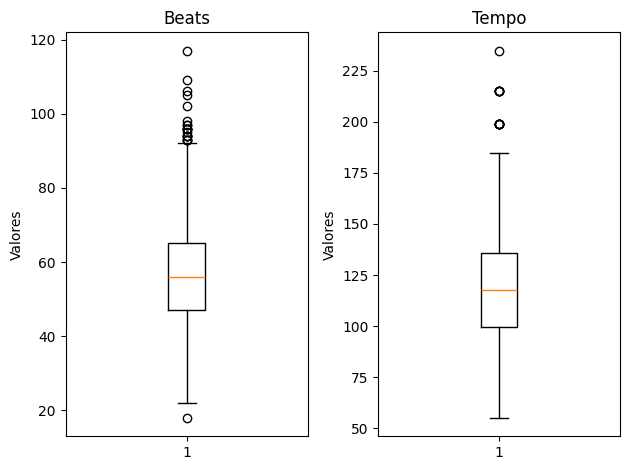

In [25]:
# Parametros
feature1 = 'beats'
feature2 = 'tempo'

# Boxplot para Beats
plt.subplot(1, 2, 1)
plt.boxplot(df[feature1])
plt.title('Beats')
plt.ylabel('Valores')

# Boxplot para Tempo
plt.subplot(1, 2, 2)
plt.boxplot(df[feature2])
plt.title('Tempo')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()


Passo 2: Calcular cv, curtose, skewness, mean, moda

In [37]:
# Parametros
feature1 = df['beats'].dropna()
feature2 = df['tempo'].dropna()

# Estatisticas para Beats
cv1 = variation(feature1) #a razão entre o desvio padrão e a média, maior a dispersão dos dados em relação à média.
curtose1 = kurtosis(feature1) #Achatamento/concentração dos dados, pico alto ( >0 ) ou achatado ( <0 )
assimetria1 = skew(feature1) #mede o grau de simetria da distribuição dos dados, cauda p/ direita (+) ou p/ esquerda (−)
media1 = np.mean(feature1) #a soma de todos os valores dividida pela quantidade de valores
moda1 = mode(feature1, keepdims=True).mode[0] #valor que mais aparece

print("\n===== BEATS =====")
print(f"Média: {media1:.2f}")
print(f"Moda: {moda1}")
print(f"Coeficiente de Variação (CV): {cv1:.2f}")
print(f"Curtose: {curtose1:.2f}")
print(f"Assimetria (Skewness): {assimetria1:.2f}")

# Estatisticas para Tempo
cv2 = variation(feature2)
curtose2 = kurtosis(feature2)
assimetria2 = skew(feature2)
media2 = np.mean(feature2)
moda2 = mode(feature2, keepdims=True).mode[0]

print("\n===== TEMPO =====")
print(f"Média: {media2:.2f}")
print(f"Moda: {moda2}")
print(f"Coeficiente de Variação (CV): {cv2:.2f}")
print(f"Curtose: {curtose2:.2f}")
print(f"Assimetria (Skewness): {assimetria2:.2f}")



===== BEATS =====
Média: 57.14
Moda: 47
Coeficiente de Variação (CV): 0.25
Curtose: 0.59
Assimetria (Skewness): 0.58

===== TEMPO =====
Média: 119.60
Moda: 123.046875
Coeficiente de Variação (CV): 0.24
Curtose: 0.45
Assimetria (Skewness): 0.61


Passo 3: Produzir outliers artificialmente

In [54]:
# Criando uma cópia da variável tempo
tempo_com_outliers = df['tempo'].dropna().copy()

# Adicionando outliers (valores muito altos)
outliers = [tempo_com_outliers.mean() * 12, tempo_com_outliers.mean() * 4]
tempo_com_outliers = pd.concat([tempo_com_outliers, pd.Series(outliers)])

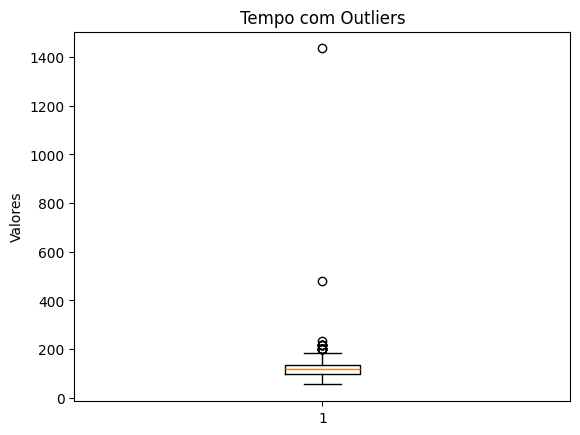

In [55]:
# plot do box-score com outliers
plt.boxplot(tempo_com_outliers)
plt.title('Tempo com Outliers')
plt.ylabel('Valores')
plt.show()

In [56]:
# Estatísticas com outliers
cv = variation(tempo_com_outliers)
curtose = kurtosis(tempo_com_outliers)
assimetria = skew(tempo_com_outliers)
media = np.mean(tempo_com_outliers)
moda = mode(tempo_com_outliers, keepdims=True).mode[0]

print("===== TEMPO COM OUTLIERS =====")
print(f"Média: {media:.2f}")
print(f"Moda: {moda}")
print(f"Coeficiente de Variação (CV): {cv:.2f}")
print(f"Curtose: {curtose:.2f}")
print(f"Assimetria (Skewness): {assimetria:.2f}")

===== TEMPO COM OUTLIERS =====
Média: 121.27
Moda: 123.046875
Coeficiente de Variação (CV): 0.42
Curtose: 422.75
Assimetria (Skewness): 16.99


Analise dos resultados

- Média: Aumentou, pois os outliers estão puxando o valor da soma total para cima.

- Moda: Não muda, pois ela depende do valor mais frequente e não dos extremos.

- CV: Aumenta, porque o desvio padrão cresce mais do que a média proporcionalmente, isso é, tem maior dispersão dos dados em relação a média.

- Curtose: A curtose aumentou muito, porque tem mais dados extremos, deixando mais dispersos e deixando a cauda mais pesada.

- Skewness: Nos dados reais já possuia uma tendencia a cauda direita, porém com a adição dos outliers a assimetria se tornou muito mais alta e continuou positiva, indicando uma cauda longa à direita.



---



***Parte B***

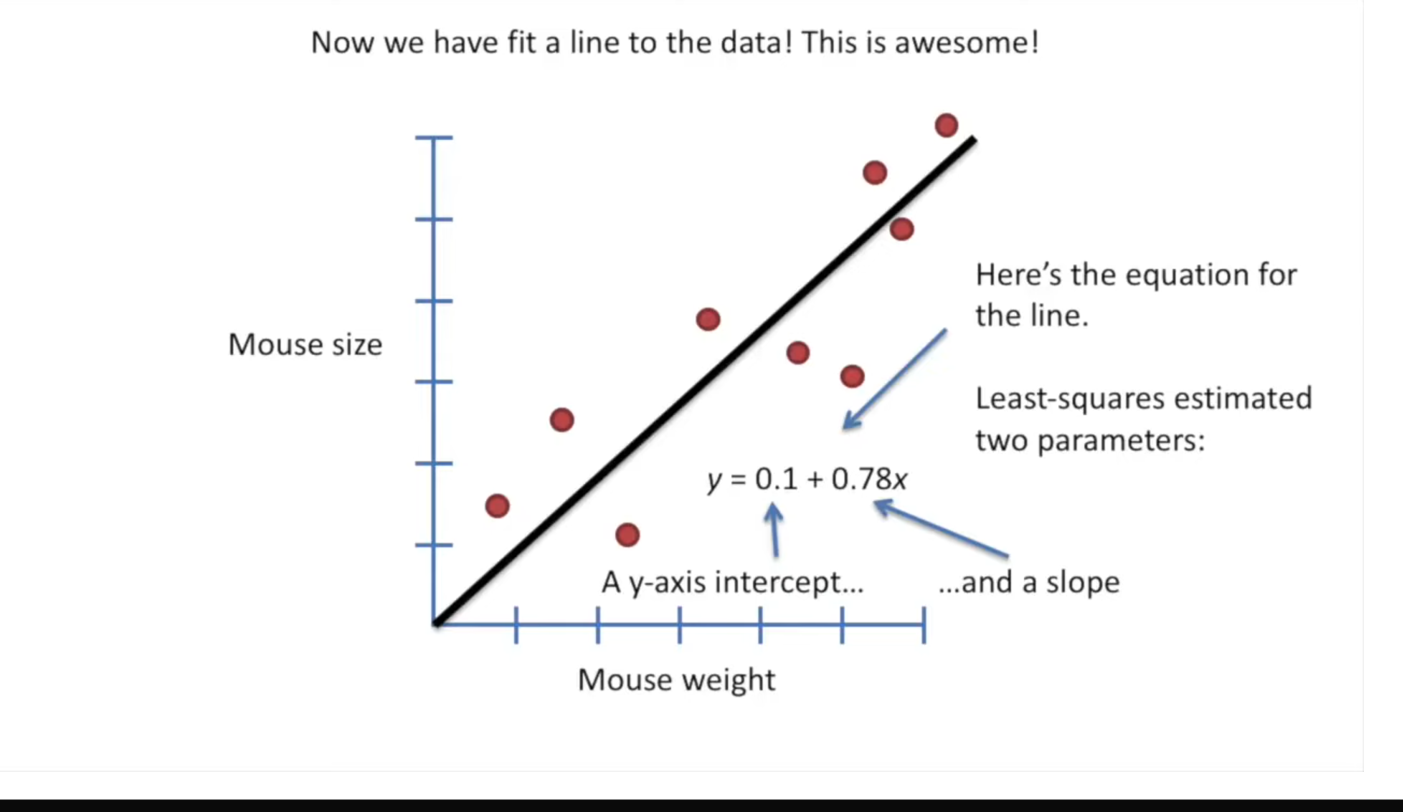

Reproduza o mais próximo possível o exemplo do slide anterior. Em seguida, aplique o linear regression do scikit-learn. Use a biblioteca import “statsmodels.api as sm” para gerar a estatísticas da regressão linear. A partir do b obtido, use 6 diferentes a’s para plotar diferentes retas, mostrando a variação na rotação e gere também o gráfico a seguir:

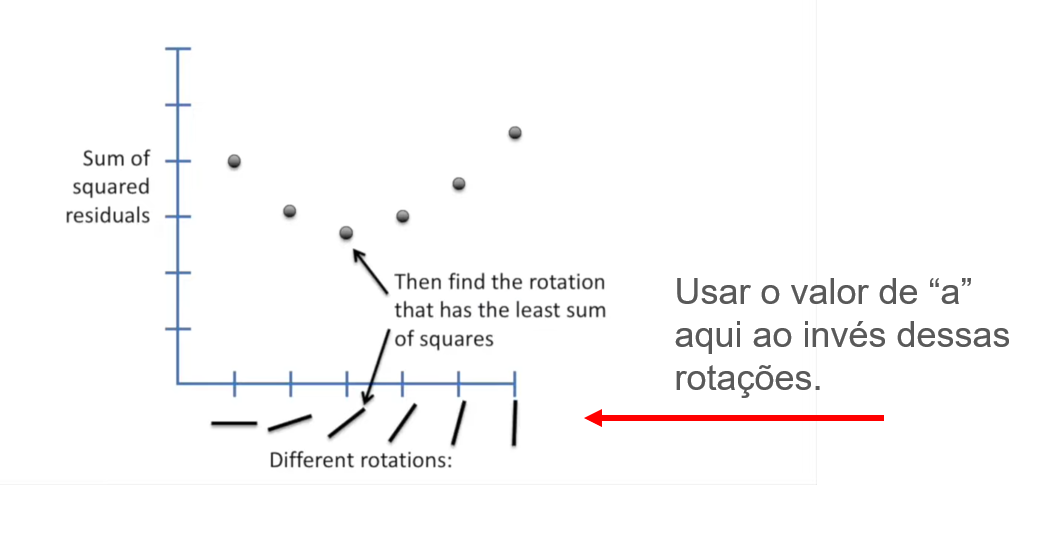

Calcule o R-Squared para cada ‘a’ e compare com o melhor obtido pelo scikit-learn.

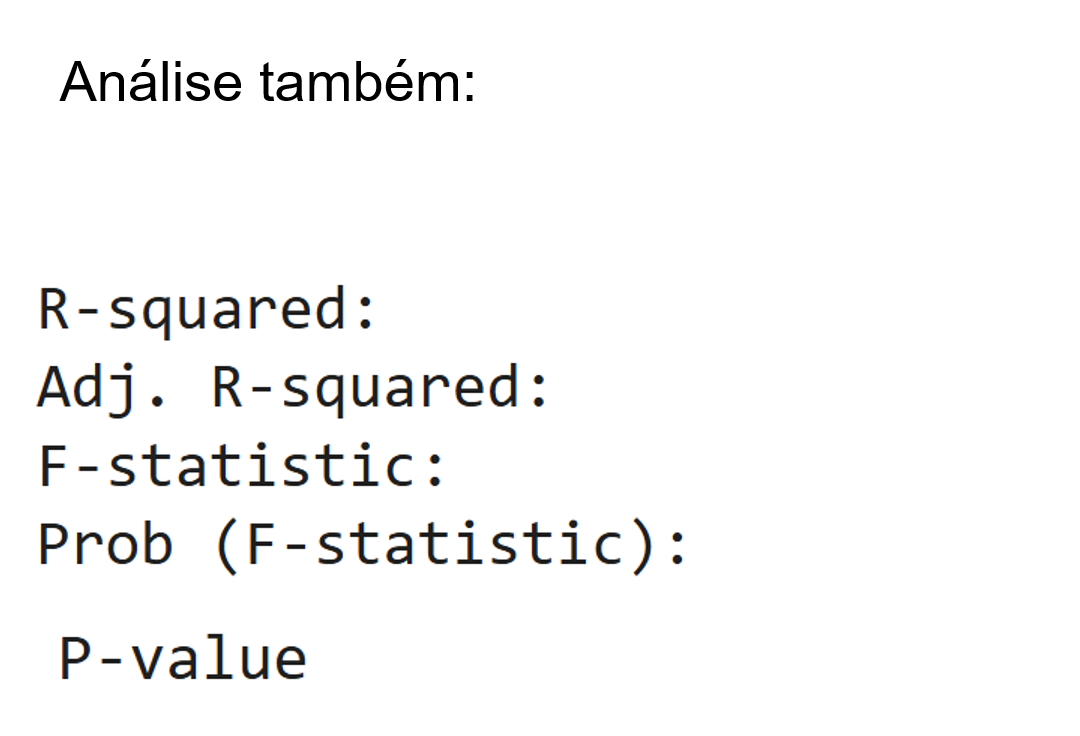

Passo 1: Reproduzir grafico

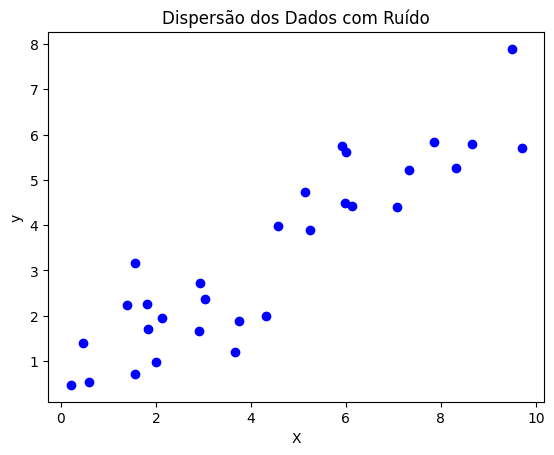

In [87]:
# Gerar dados
np.random.seed(42)
X = np.random.rand(30, 1) * 10  # Variável independente (0 a 10)
ruido = np.random.randn(30, 1)  # Ruído normal (média=0, desvio=1)
y = 0.1 + 0.78 * X + ruido        # Relação linear com ruído

# Plotar os dados
plt.scatter(X, y, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dispersão dos Dados com Ruído')
plt.show()

Passo 2: Aplicar a regressão linear

Coeficiente (Inclinação): 0.6406921028310789
Intercepto: 0.5289712779012219


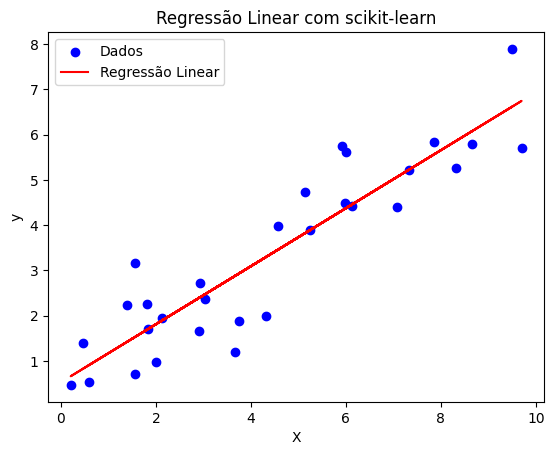

In [88]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Fazer previsões (opcional, só para plotar a linha)
y_pred = modelo.predict(X)

# Exibir coeficientes
print("Coeficiente (Inclinação):", modelo.coef_[0][0])
print("Intercepto:", modelo.intercept_[0])

# Plotar os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred, color='red', label='Regressão Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com scikit-learn')
plt.legend()
plt.show()

Passo 3: Gerar estatisticas

In [89]:
# Adicionar uma constante para o intercepto (obrigatório no statsmodels)
X_sm = sm.add_constant(X)

# Ajustar o modelo
modelo_sm = sm.OLS(y, X_sm).fit()

# Resumo estatístico completo
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     131.9
Date:                Wed, 21 May 2025   Prob (F-statistic):           4.15e-12
Time:                        20:12:53   Log-Likelihood:                -36.598
No. Observations:                  30   AIC:                             77.20
Df Residuals:                      28   BIC:                             80.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5290      0.290      1.827      0.0

Passo 4: A partir do resultado do B, aplicar a os a's para plotar variações da rotação

Passo 5: Calcular o R-squared para cada "a"

Comparação com o melhor resultado do scikit-learn

...

Passo 6: Analisar R-squared, adj. r-squared, f-statistic, prob e p-value

In [ ]:
# gerar o resultado para a analise

Discussão

...